<a href="https://colab.research.google.com/github/farahaashraf/NLU_/blob/main/NLU_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers datasets peft accelerate evaluate scikit-learn sentencepiece


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
import torch
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer
from peft import LoraConfig, get_peft_model, TaskType
import matplotlib.pyplot as plt



In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-z0-9.,!?\'\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load and clean
df = pd.read_csv("/content/drive/MyDrive/nlu/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1')
df = df[['essay_id', 'essay_set', 'essay', 'domain1_score']].dropna()
df['essay'] = df['essay'].apply(clean_text)

In [ ]:
print(df.head())

   essay_id  essay_set                                              essay  \
0         1          1  dear local newspaper, i think effects computer...   
1         2          1  dear , i believe that using computers will ben...   
2         3          1  dear, more and more people use computers, but ...   
3         4          1  dear local newspaper, i have found that many e...   
4         5          1  dear , i know having computers has a positive ...   

   domain1_score  
0              8  
1              9  
2              7  
3             10  
4              8  


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training samples: {len(train_df)}, Test samples: {len(test_df)}")

Training samples: 10380, Test samples: 2596


In [ ]:
base_model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(base_model_name)
base_model = AutoModelForSeq2SeqLM.from_pretrained(base_model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
def generate_score_base_model(essay_text):
    inputs = tokenizer(
        "Generate score for this essay: " + essay_text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(base_model.device)

    outputs = base_model.generate(**inputs, max_length=128)
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

    try:
        score = float(re.search(r"Score:\s*(\d+(\.\d+)?)", decoded_output).group(1))
    except:
        score = 0.0

    return score


In [ ]:
# Generate scores using base model without LoRA
test_df['base_model_score'] = test_df['essay'].apply(generate_score_base_model)


In [ ]:
from scipy.stats import pearsonr
# Base model
mse_base = mean_squared_error(test_df['domain1_score'], test_df['base_model_score'])
r2_base = r2_score(test_df['domain1_score'], test_df['base_model_score'])
corr_base, _ = pearsonr(test_df['domain1_score'], test_df['base_model_score'])
print("\nBase Model (no fine-tuning):")
print(f"  MSE: {mse_base:.2f}")
print(f"  R²: {r2_base:.2f}")
print(f"  Pearson correlation: {corr_base:.2f}")


Base Model (no fine-tuning):
  MSE: 151.14
  R²: -0.94
  Pearson correlation: -0.02


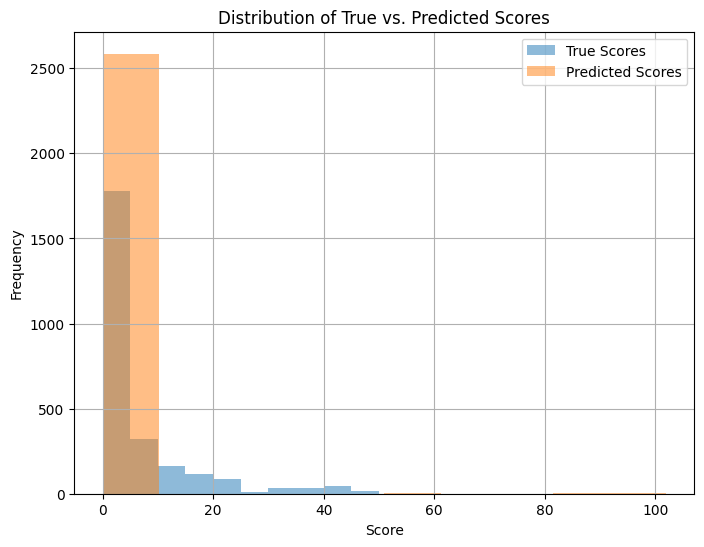

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(test_df['domain1_score'], bins=10, alpha=0.5, label='True Scores')
plt.hist(test_df['base_model_score'], bins=10, alpha=0.5, label='Predicted Scores')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of True vs. Predicted Scores")
plt.legend()
plt.grid(True)
plt.show()

Model with LORA





In [ ]:
lora_config = LoraConfig(
    r=32,                # Higher rank → more capacity
    lora_alpha=32,       # Stronger scaling
    target_modules=["q", "k", "v", "o"],  # Add key/output layers
    lora_dropout=0.1,    # Slightly higher dropout for regularization
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM
)
model = get_peft_model(base_model, lora_config)
model.print_trainable_parameters()


trainable params: 7,077,888 || all params: 254,655,744 || trainable%: 2.7794


In [ ]:
def preprocess(example):
    inputs = tokenizer(
        "Generate feedback and a score for this essay: " + example["essay"],
        padding="max_length",
        truncation=True,
        max_length=512
    )
    targets = tokenizer(
        f"Score: {example['domain1_score']}. Feedback: [PLACEHOLDER FEEDBACK].",
        padding="max_length",
        truncation=True,
        max_length=128
    )
    inputs["labels"] = targets["input_ids"]
    return inputs

train_dataset = Dataset.from_pandas(train_df).map(preprocess, remove_columns=list(train_df.columns))
test_dataset = Dataset.from_pandas(test_df).map(preprocess, remove_columns=list(test_df.columns))


Map:   0%|          | 0/10380 [00:00<?, ? examples/s]

Map:   0%|          | 0/2596 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./feedback-lora",
    per_device_train_batch_size=4,
    learning_rate=2e-4,
    num_train_epochs=2,
    logging_dir="./logs",
    save_strategy="epoch",
    report_to="none",
    label_names=["labels"]
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
500,3.068400
1000,0.045500
1500,0.035500
2000,0.029700
2500,0.026700
3000,0.023800
3500,0.022400
4000,0.022100
4500,0.020700
5000,0.020400


TrainOutput(global_step=5190, training_loss=0.32012735708600526, metrics={'train_runtime': 3069.2989, 'train_samples_per_second': 6.764, 'train_steps_per_second': 1.691, 'total_flos': 1.466695296221184e+16, 'train_loss': 0.32012735708600526, 'epoch': 2.0})

In [ ]:
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

def generate_score_and_logic_feedback(essay_text):
    # Generate score using the model
    inputs = tokenizer(
        "Generate score for this essay: " + essay_text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(model.device)

    outputs = model.generate(**inputs, max_length=128)
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

    try:
        score = float(re.search(r"Score:\s*(\d+(\.\d+)?)", decoded_output).group(1))
    except:
        score = 0.0

    # Logic-based feedback components
    word_count = len(essay_text.split())
    sentence_count = essay_text.count('.') + essay_text.count('!') + essay_text.count('?')
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    # Check use of transition words
    transition_words = {"however", "moreover", "therefore", "furthermore", "in conclusion", "for example"}
    transitions_used = sum(1 for word in transition_words if word in essay_text.lower())

    # Check vocabulary richness
    vectorizer = CountVectorizer()
    vectorizer.fit([essay_text])
    vocab_size = len(vectorizer.vocabulary_)

    # Grammar and spelling
    blob = TextBlob(essay_text)
    grammar_errors = len(blob.correct().split()) - len(essay_text.split())

    # Generate feedback
    feedback_parts = []

    if word_count < 75:
        feedback_parts.append("The essay is too short and lacks detail.")
    elif word_count < 150:
        feedback_parts.append("The essay is moderately developed but could use more elaboration.")
    else:
        feedback_parts.append("The essay is well-developed in terms of length.")

    if avg_sentence_length < 10:
        feedback_parts.append("Try using more complex sentence structures.")
    elif avg_sentence_length > 25:
        feedback_parts.append("Some sentences may be too long and could be made clearer.")

    if transitions_used == 0:
        feedback_parts.append("Consider using transition words to improve flow.")
    else:
        feedback_parts.append("Good use of transition words enhances coherence.")

    if vocab_size < 50:
        feedback_parts.append("Try using a richer vocabulary to express ideas more clearly.")

    if grammar_errors > 3:
        feedback_parts.append("There are noticeable spelling or grammar issues that should be addressed.")

    feedback = " ".join(feedback_parts)

    return score, feedback


In [ ]:
# Apply the model-based function to the test set
test_df[['generated_score', 'generated_feedback']] = test_df['essay'].apply(
    lambda essay: pd.Series(generate_score_and_logic_feedback(essay))
)

# Display results with essay, true score, generated score, and feedback
print(test_df[['essay_id', 'essay', 'domain1_score', 'generated_score', 'generated_feedback']].head(10))

      essay_id                                              essay  \
6351      9908  the author concludes the story wthis paragraph...   
6315      9872  i believe that the author concludes the story ...   
304        305  computers, a very much talked about subject. d...   
8023     12771  i think in my opion is that the author was ver...   
4442      6839  the setting that affect the cyclist is the con...   
2929      4124  i dont think so becuase what if that is all th...   
2802      3997  if content in a library is considered offensiv...   
7952     12700  the author created a tone in the memoir that w...   
4655      7053  the hot, dry, desert setting affects the cycli...   
5885      9441  the author of the winter hibiscus concludes th...   

      domain1_score  generated_score  \
6351              1              2.0   
6315              2              3.0   
304              10              8.0   
8023              1              2.0   
4442              1              2.0   


In [ ]:
output_dir = "/content/drive/MyDrive/feedbackmodelloralastyarab222"  # Specify the directory where you want to save the model

# Save the model
model.save_pretrained(output_dir)

# Save the tokenizer
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")


Model and tokenizer saved to /content/drive/MyDrive/feedbackmodelloralastyarab222


In [ ]:
new_essay = """
Artificial intelligence has the potential to revolutionize many industries. From healthcare to education, AI can help automate tasks, analyze large datasets, and improve decision-making processes. However, the widespread adoption of AI also raises concerns about job displacement, privacy, and the ethical implications of autonomous systems. As AI continues to evolve, it is essential to address these challenges while maximizing its benefits.
"""

# Generate score from model and logic feedback
generated_score, generated_feedback = generate_score_and_logic_feedback(new_essay)

# Print the results
print(f"Generated Score: {generated_score}")
print(f"Generated Feedback: {generated_feedback}")

Generated Score: 2.0
Generated Feedback: The essay is too short and lacks detail. Good use of transition words enhances coherence.


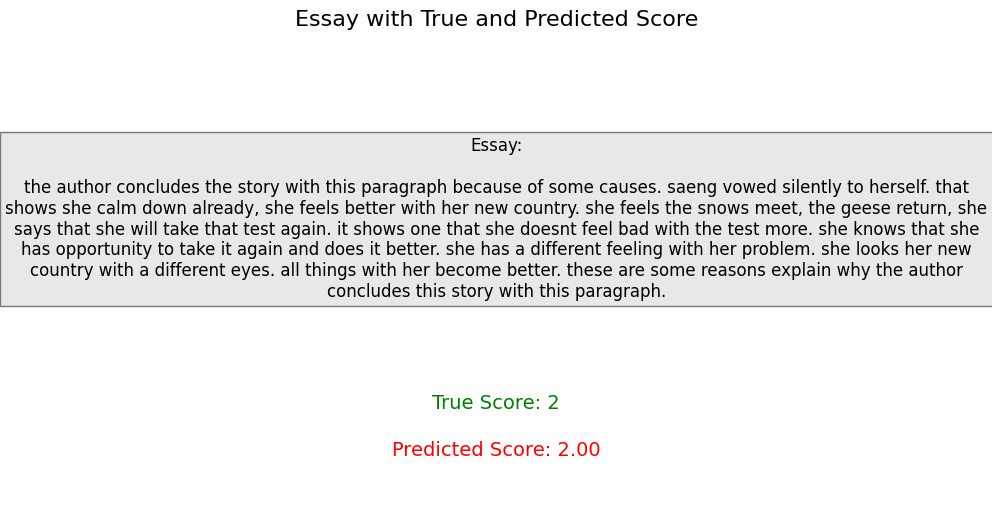

In [ ]:
import matplotlib.pyplot as plt

# Select a random essay from the test data
essay_idx = 910  # You can change this index to any specific essay index
essay_text = test_df.iloc[essay_idx]['essay']
true_score = test_df.iloc[essay_idx]['domain1_score']

# Generate the predicted score from the model
generated_score, generated_feedback = generate_score_and_logic_feedback(essay_text)

# Create a simple visualization with Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the essay text
ax.text(0.5, 0.6, f"Essay:\n\n{essay_text}", ha='center', va='center', wrap=True, fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.5))

# Plot the true and predicted scores
ax.text(0.5, 0.2, f"True Score: {true_score}", ha='center', va='center', fontsize=14, color='green')
ax.text(0.5, 0.1, f"Predicted Score: {generated_score:.2f}", ha='center', va='center', fontsize=14, color='red')

# Hide axes
ax.axis('off')

plt.title("Essay with True and Predicted Score", fontsize=16)
plt.show()


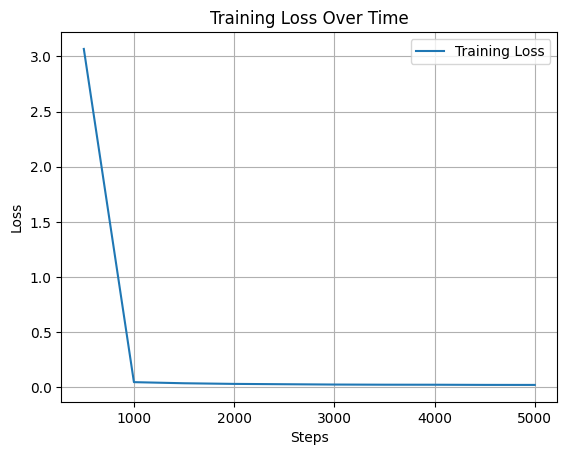

In [ ]:
import matplotlib.pyplot as plt

# Load training log history (if using Trainer API, logs are saved automatically)
logs = trainer.state.log_history

loss_values = [log["loss"] for log in logs if "loss" in log]
steps = [log["step"] for log in logs if "loss" in log]

plt.plot(steps, loss_values, label="Training Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()


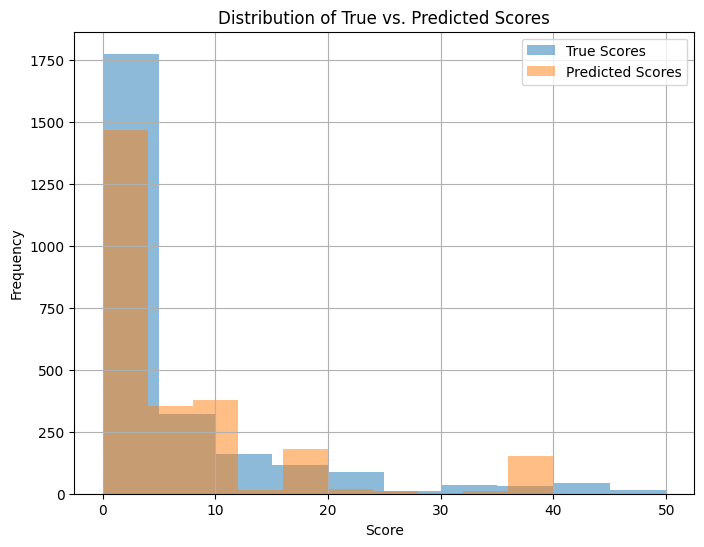

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(test_df['domain1_score'], bins=10, alpha=0.5, label='True Scores')
plt.hist(test_df['generated_score'], bins=10, alpha=0.5, label='Predicted Scores')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of True vs. Predicted Scores")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# After generating scores for test set
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_df['domain1_score'], test_df['generated_score'])
r2 = r2_score(test_df['domain1_score'], test_df['generated_score'])
print(f"T5 Model MSE: {mse:.2f}, R²: {r2:.2f}")

T5 Model MSE: 15.14, R²: 0.81


In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(test_df['domain1_score'], test_df['generated_score'])
print(f"Pearson correlation: {corr:.2f}")


Pearson correlation: 0.91


In [ ]:
print(test_df[['essay_id', 'essay', 'domain1_score', 'generated_score', 'generated_feedback']])

       essay_id                                              essay  \
6351       9908  the author concludes the story wthis paragraph...   
6315       9872  i believe that the author concludes the story ...   
304         305  computers, a very much talked about subject. d...   
8023      12771  i think in my opion is that the author was ver...   
4442       6839  the setting that affect the cyclist is the con...   
...         ...                                                ...   
3857       6253  when the cyclist takes off on the road again h...   
3312       4507  we all don't think of anything when your child...   
79           80  dear , name is and i do not believe that compu...   
7530      12278  the mood that narciso rodriguez created was a ...   
12372     20866  it was one of those days where i just sat arou...   

       domain1_score  generated_score  \
6351               1              2.0   
6315               2              3.0   
304               10              8.